# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['NEPTUNE_API_TOKEN']="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5NDc0ZmNhNi0wODFlLTRhYTktYjgwZS01MWJkMDMxNWJhNTAifQ=="
os.environ['NEPTUNE_PROJECT']="guilhermemg/icao-nets-training-2"
os.environ['NEPTUNE_NOTEBOOK_ID']="98a391a1-c710-40bd-aaf4-42c31862cbbe"
os.environ['NEPTUNE_NOTEBOOK_PATH']="training/exec_nas_experiment.ipynb"

In [3]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0, '..')

In [4]:
from src.m_utils import constants as cts
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName
from src.exp_runner import ExperimentRunner

from src.base.experiment.dataset.dataset import Dataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection
from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.optimizers import Optimizer

from src.m_utils.stl_approach import STLApproach
from src.m_utils.mtl_approach import MTLApproach
from src.m_utils.nas_mtl_approach import NAS_MTLApproach

from src.nas.v3.nas_algorithm import NASAlgorithm
from src.nas.v3.mlp_search_space import MLPSearchSpaceIndicator

/stage/envs/icao_nets_training/lib/python3.8/site-packages/neptune/internal/backends/hosted_client.py:50: NeptuneDeprecationWarning: The 'neptune-client' package has been deprecated and will be removed in the future. Install the 'neptune' package instead. For more, see https://docs.neptune.ai/setup/upgrading/
  from neptune.version import version as neptune_client_version


 ==> Restrict GPU memory growth: True


/home/guilherme/doutorado/mteval-icao-reqs/submodules/icao_nets_training/project/training/../src/base/experiment/evaluation/model_evaluator.py:10: NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
  from neptune.new.types import File


# Start Network Runner

In [5]:
DATASET = Dataset.CELEB_A
APPROACH = NAS_MTLApproach.APPROACH_3

kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'NAS experiment',
        'description': 'NAS with Approach 3 - Experimenting with VGG-16 as base model',
        'tags': [f'{DATASET.value["name"]}', 'nas', 'nas_approach_3_v3_fixed', 'final_experiments_2'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': APPROACH,
        'dataset': DATASET,
        'tasks': DATASET.value['tasks'],
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1,
    },
    'nas_params': {
        'architecture_training_epochs': 5,     # n_epochs for training proposed architecture
        'total_num_proposed_architectures': 30,
        'nas_algorithm': NASAlgorithm.EVOLUTION,
        'nas_search_space': MLPSearchSpaceIndicator.SS_2
    },
    'controller_params': {
        'controller_max_proposed_arch_len': 8,   # == sss = 5 / tss = 6 / max_len = 8 (n_denses+n_convs)
        'controller_classes': MLPSearchSpaceIndicator.SS_2.value['n_classes'],    # == n_candidates ==> sss = 8 / n_operations ==> tss = 5 / classes = 8 (n_denses+n_convs)
        'controller_lstm_dim': 100,
        'controller_optimizer': Optimizer.ADAM,
        'controller_learning_rate': 0.006,
        'controller_decay': 0.0,
        'controller_momentum': 0.0,
        'controller_use_predictor': False,
        'controller_loss_alpha': 0.3,  # 0.9, 0.6, 0.3
        'controller_training_epochs': 20,
        'controller_batch_size': 10
    },
    'mlp_params': {
        'mlp_base_model': BaseModel.VGG16,
        'mlp_n_epochs': 50,
        'mlp_batch_size': 32,
        'mlp_early_stopping': 50,
        'mlp_optimizer': Optimizer.ADAMAX,
        'mlp_learning_rate': 1e-3,
        'mlp_decay': 0.0,
        'mlp_momentum': 0.0,
        'mlp_dropout': 0.3,
        'mlp_loss_function': 'sparse_categorical_crossentropy',
        'mlp_one_shot': False
    }
}


runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 6909
Process ID: 30474
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'controller_params': {'controller_batch_size': 10,
                       'controller_classes': 8,
                       'controller_decay': 0.0,
                       'controller_learning_rate': 0.006,
                       'controller_loss_alpha': 0.3,
                       'controller_lstm_dim': 100,
                       'controller_max_proposed_arch_len': 8,
                       'controller_momentum': 0.0,
                       'controller_optimizer': <Optimizer.ADAM: 'Adam'>,
                       'controller_training_epochs': 20,
                       'controller_use_predictor': False},
 'exp_params': {'description': 'NAS with Approach 3 - Experimenting with '
                               'VGG-16 as base model',
                'name': 'NAS experiment

/home/guilherme/doutorado/mteval-icao-reqs/submodules/icao_nets_training/project/training/../src/m_utils/neptune_utils.py:27: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  self.neptune_run = neptune.init_run(name=self.config_interp.exp_args['name'],


https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-510
----
Model path:  trained_model
----
Checking model existence locally...
Training a new model! Not checking model existence
----
------------------------------
Checking GPU availability
 ..GPU is available!
------------------------------


# Load Data

In [6]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data


TrainData.shape: (162770, 42)
ValidationData.shape: (19867, 42)
TestData.shape: (19962, 42)
Data loaded


In [7]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


In [8]:
runner.train_data.head()

,img_name,split,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,/home/guilherme/data1/Dropbox/Link to Desktop/...,train,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,/home/guilherme/data1/Dropbox/Link to Desktop/...,train,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,/home/guilherme/data1/Dropbox/Link to Desktop/...,train,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,/home/guilherme/data1/Dropbox/Link to Desktop/...,train,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
4,/home/guilherme/data1/Dropbox/Link to Desktop/...,train,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


runner.produce_fake_data()

# Data Generators

In [9]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators


Found 162770 validated image filenames.
Found 19867 validated image filenames.
Found 19962 validated image filenames.
TOTAL: 202599

Logging class indices
 .. MTL model not logging class indices!

Using benchmarking dataset. Not logging class labels!


# Setup Experiment

In [10]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setting up neptune experiment
Neptune experiment setup done!


# Labels Distribution

In [11]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search - v3

In [12]:
best_arch = runner.run_neural_architecture_search_v3()

-------------------- run neural architecture search -------------------
 -- Using search space: {'name': 'ss_2', 'n_classes': 8}
 -- Using NAS algorithm: NASAlgorithm.EVOLUTION

Model path:  trained_model
----
Checking model existence locally...
Training a new model! Not checking model existence
----
------------------------------
Checking GPU availability
 ..GPU is available!
------------------------------
  New Controller Epoch | Feedback ID: 1 | Feedback DNA: DNA([[2, 2, 4, 1], [2, 0, 0, 0]])
----------------------------------------------------------------------
------------------------------------------------------------
 -- Architecture 1: {'n_denses_0': 3, 'n_denses_1': 3, 'n_denses_2': 5, 'n_denses_3': 2, 'n_convs_0': 3, 'n_convs_1': 1, 'n_convs_2': 1, 'n_convs_3': 1}
Creating model...


Model created
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 18,270,032
  .. Trainable params: 3,555,344
  .. Non-trainable params: 14,714,688

Epoch 00001: val_loss improved from inf to 0.87395, saving model to training/training_ckpt/best_model.hdf5

Epoch 00002: val_loss improved from 0.87395 to 0.83036, saving model to training/training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.83036 to 0.80657, saving model to training/training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.80657 to 0.78323, saving model to training/training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.78323 to 0.77228, saving model to training/training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
621/621 [==============================] - 86s 136ms/step
Prediction finished!
  Task  0: 5_o_Clock_Shadow | EER_mean: 0.10280 | EER_interp: 0.10280 | ACC: 0.89720
  Task  1: Arch

# Create Model with Best Architecture Found

In [ ]:
runner.create_model(best_arch)

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [ ]:
%%capture
runner.visualize_model(outfile_path=f"training/figs/nas/nas_model_{APPROACH.name}.png")

FileNotFoundError: [Errno 2] No such file or directory: 'training/figs/nas/nas_model_APPROACH_3.png'

In [ ]:
%%capture
runner.model_summary()

# Training Model

In [ ]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 16,993,684
  .. Trainable params: 2,278,996
  .. Non-trainable params: 14,714,688
Epoch 1/50


1500/1500 [==============================] - 658s 436ms/step - loss: 0.0959 - tshirt_loss: 0.1300 - trouser_loss: 0.0376 - pullover_loss: 0.1216 - dress_loss: 0.0888 - coat_loss: 0.1478 - sandal_loss: 0.0553 - shirt_loss: 0.2033 - sneaker_loss: 0.0563 - bag_loss: 0.0726 - ankle_boot_loss: 0.0456 - tshirt_accuracy: 0.9533 - trouser_accuracy: 0.9882 - pullover_accuracy: 0.9522 - dress_accuracy: 0.9662 - coat_accuracy: 0.9368 - sandal_accuracy: 0.9825 - shirt_accuracy: 0.9162 - sneaker_accuracy: 0.9776 - bag_accuracy: 0.9794 - ankle_boot_accuracy: 0.9843 - val_loss: 0.0583 - val_tshirt_loss: 0.0873 - val_trouser_loss: 0.0153 - val_pullover_loss: 0.0881 - val_dress_loss: 0.0579 - val_coat_loss: 0.0790 - val_sandal_loss: 0.0217 - val_shirt_loss: 0.1474 - val_sneaker_loss: 0.0309 - val_bag_loss: 0.0271 - val_ankle_boot_loss: 0.0279 - val_tshirt_accuracy: 0.9664 - val_trouser_accuracy: 0.9965 - val_pullover_accuracy: 0.9657 - val_dress_accuracy: 0.9772 - val_coat_accuracy: 0.9683 - val_sandal

# Plots

-------------------- draw training history -------------------


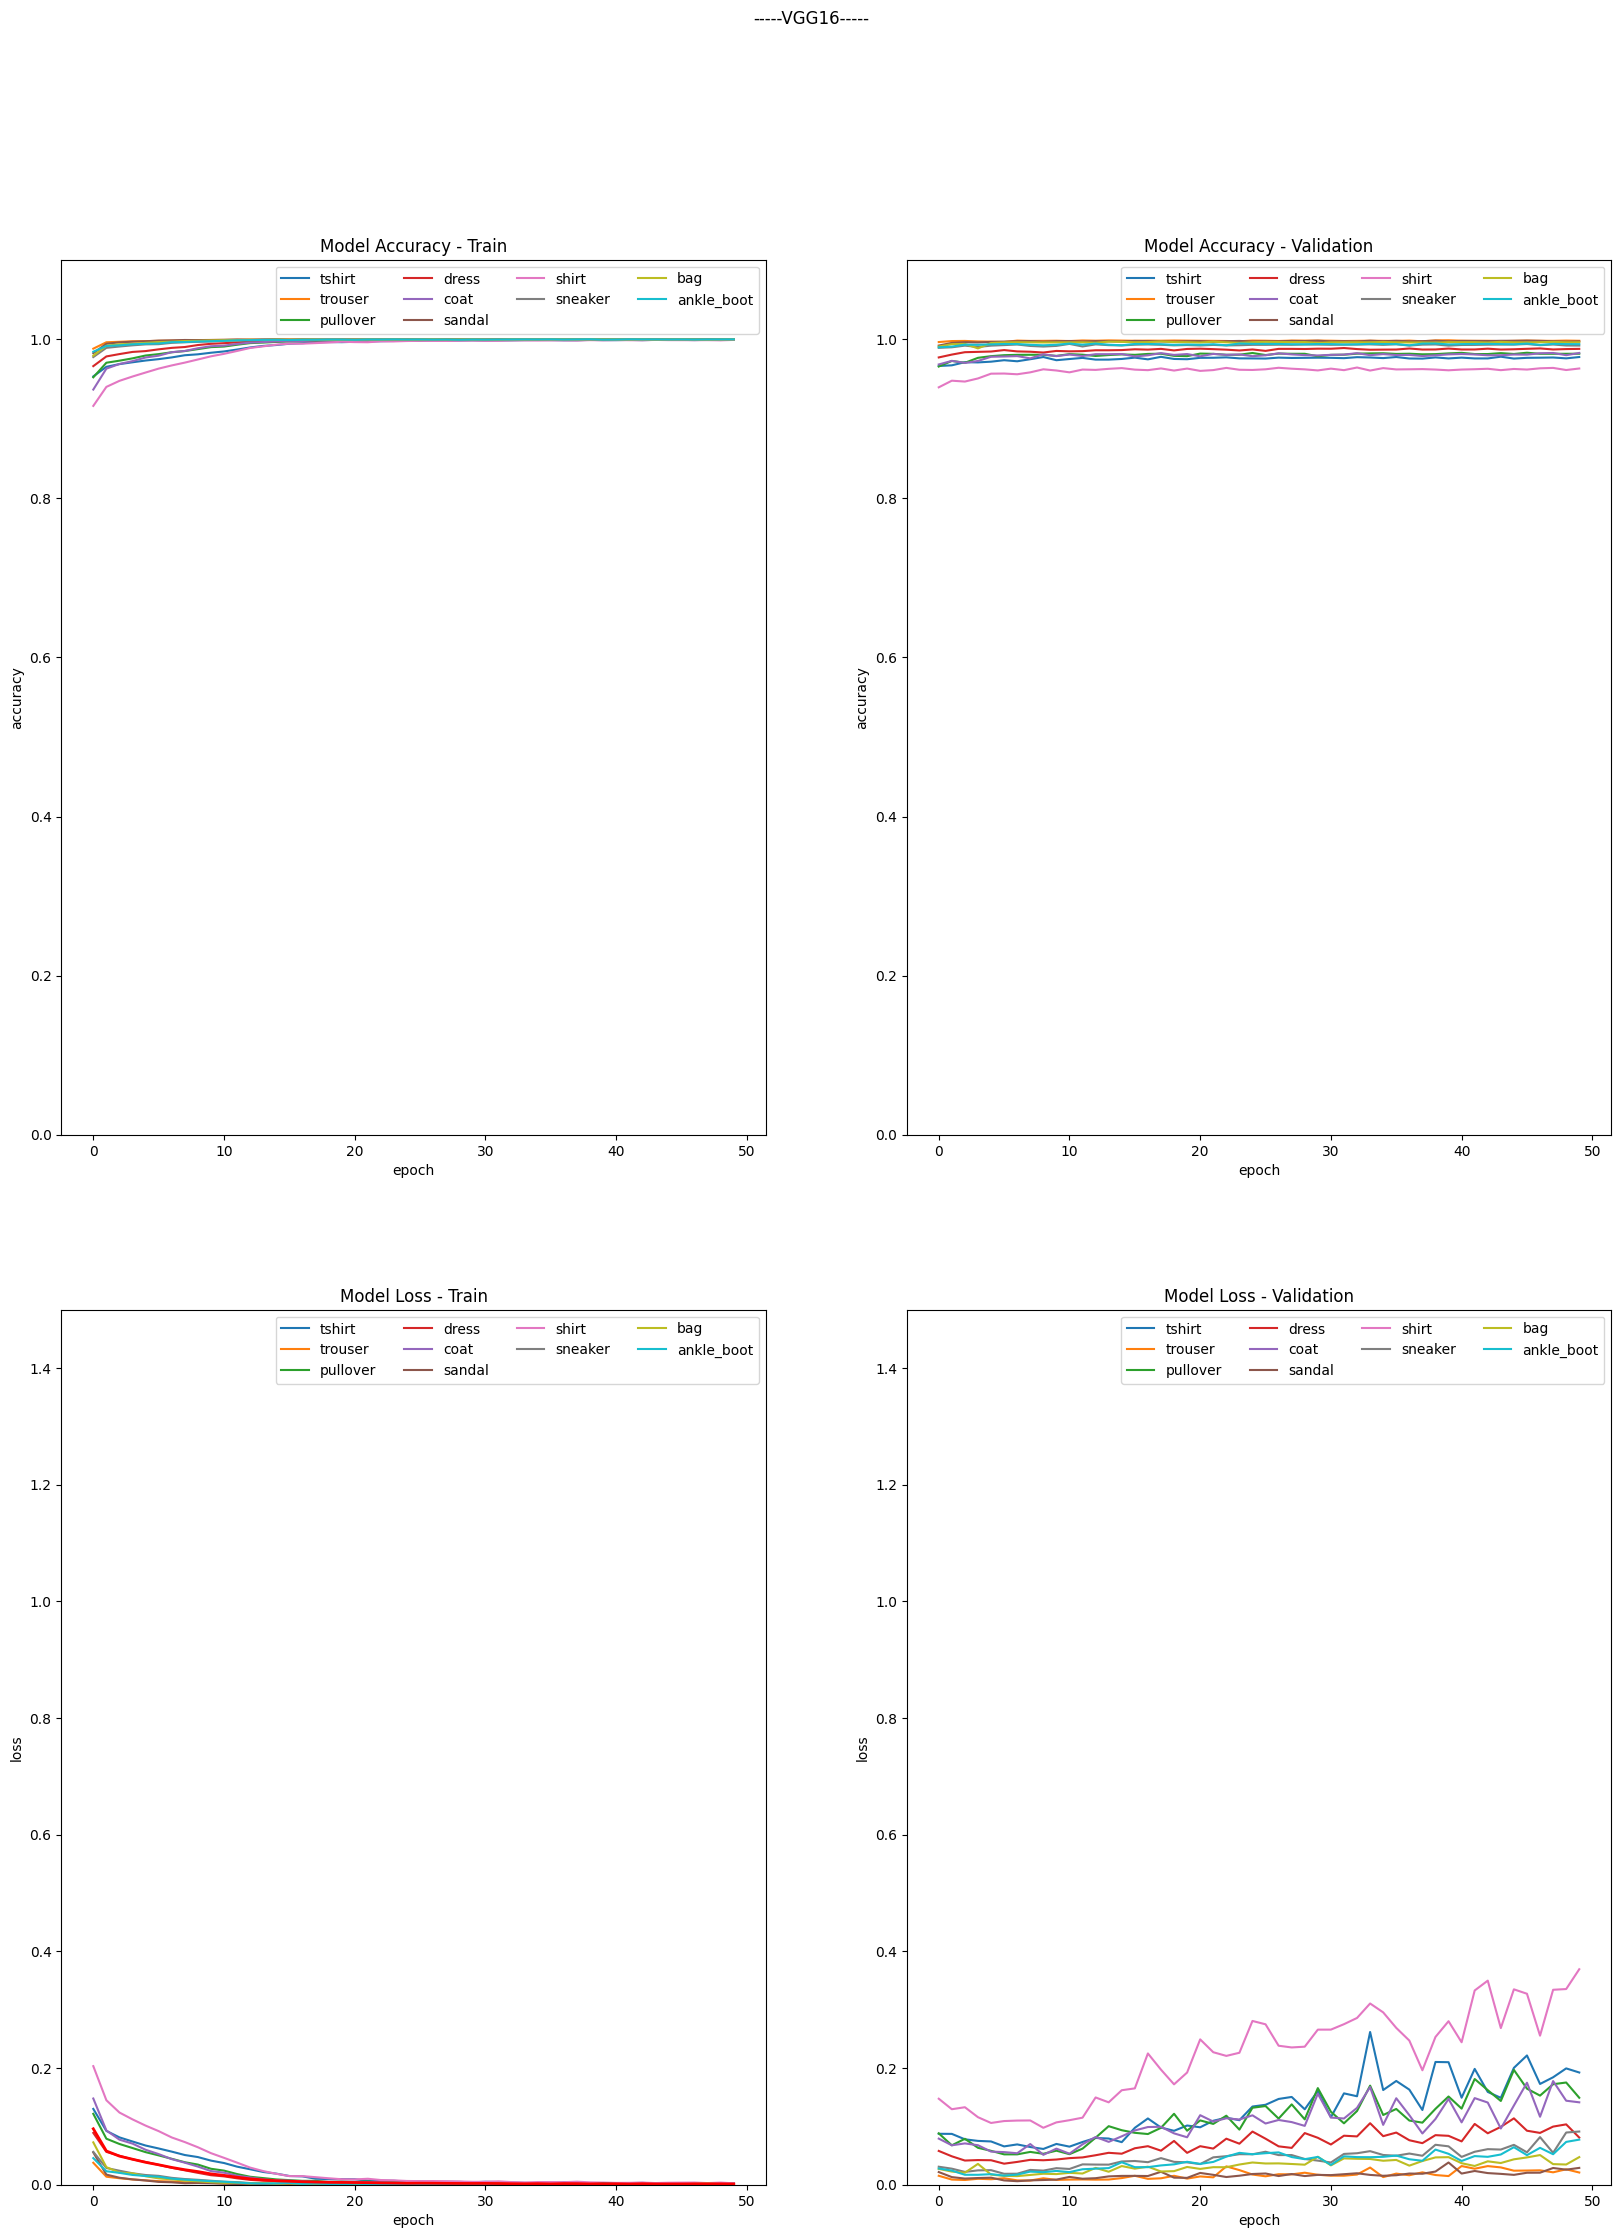

In [ ]:
runner.draw_training_history()

# Load Best Model

In [ ]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [ ]:
runner.save_model()

-------------------- save model -------------------
Saving model


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [ ]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
  1/375 [..............................] - ETA: 3:03

375/375 [==============================] - 45s 120ms/step
Prediction finished!
  Task  0: tshirt          | EER_mean: 0.04020 | EER_interp: 0.04030 | ACC: 0.95980
  Task  1: trouser         | EER_mean: 0.00670 | EER_interp: 0.00650 | ACC: 0.99370
  Task  2: pullover        | EER_mean: 0.03280 | EER_interp: 0.03280 | ACC: 0.96720
  Task  3: dress           | EER_mean: 0.02160 | EER_interp: 0.02160 | ACC: 0.97840
  Task  4: coat            | EER_mean: 0.03650 | EER_interp: 0.03660 | ACC: 0.96350
  Task  5: sandal          | EER_mean: 0.00430 | EER_interp: 0.00460 | ACC: 0.99570
  Task  6: shirt           | EER_mean: 0.07740 | EER_interp: 0.07740 | ACC: 0.92250
  Task  7: sneaker         | EER_mean: 0.00970 | EER_interp: 0.00960 | ACC: 0.99040
  Task  8: bag             | EER_mean: 0.00920 | EER_interp: 0.00920 | ACC: 0.99080
  Task  9: ankle_boot      | EER_mean: 0.00910 | EER_interp: 0.00960 | ACC: 0.99080
final_EER_mean: 2.48% | final_EER_median: 1.56% | final_EER_std_dv: 2.16% | final

## Test Split

In [ ]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
  2/313 [..............................] - ETA: 48s

313/313 [==============================] - 41s 131ms/step
Prediction finished!
  Task  0: tshirt          | EER_mean: 0.04700 | EER_interp: 0.04700 | ACC: 0.95300
  Task  1: trouser         | EER_mean: 0.00900 | EER_interp: 0.00900 | ACC: 0.99110
  Task  2: pullover        | EER_mean: 0.03660 | EER_interp: 0.03680 | ACC: 0.96340
  Task  3: dress           | EER_mean: 0.02500 | EER_interp: 0.02500 | ACC: 0.97510
  Task  4: coat            | EER_mean: 0.03820 | EER_interp: 0.03860 | ACC: 0.96170
  Task  5: sandal          | EER_mean: 0.00500 | EER_interp: 0.00480 | ACC: 0.99540
  Task  6: shirt           | EER_mean: 0.07890 | EER_interp: 0.07890 | ACC: 0.92110
  Task  7: sneaker         | EER_mean: 0.00960 | EER_interp: 0.00980 | ACC: 0.99040
  Task  8: bag             | EER_mean: 0.01000 | EER_interp: 0.00980 | ACC: 0.99040
  Task  9: ankle_boot      | EER_mean: 0.01200 | EER_interp: 0.01180 | ACC: 0.98830
final_EER_mean: 2.72% | final_EER_median: 1.84% | final_EER_std_dv: 2.23% | final

# Visualize Model Classification

# Finishing Experiment Manager

In [ ]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 24 operations to synchronize with Neptune. Do not kill this process.
All 24 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-505/metadata
